In [5250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns
import talib 
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from matplotlib.colors import ListedColormap
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression



In [5251]:
startdate = '2016-01-1'
enddate= '2021-12-31'
scaler = MinMaxScaler()

In [5252]:
dji = pdr.get_data_yahoo('^DJI', start=startdate, end=enddate)
dji_norm = pd.DataFrame(scaler.fit_transform(dji), columns=dji.columns)
n225 = pdr.get_data_yahoo("^N225", start=startdate, end=enddate)
n225_norm = pd.DataFrame(scaler.fit_transform(n225), columns=n225.columns)
hsi = pdr.get_data_yahoo("^HSI", start=startdate, end=enddate)
hsi_norm = pd.DataFrame(scaler.fit_transform(hsi), columns=hsi.columns)
sse = pdr.get_data_yahoo("000001.SS", start=startdate, end=enddate)
sse_norm = pd.DataFrame(scaler.fit_transform(sse), columns=sse.columns)


<h1>Dow Jones Industrial Average</h1>

<h2>Feature Selection</h2>

In [5253]:
dji['Future Close'] = dji['Close'].shift(-1)
dji

,High,Low,Open,Close,Volume,Adj Close,Future Close
Date,,,,,,,
2015-12-31,17590.660156,17421.160156,17590.660156,17425.029297,93690000,17425.029297,17148.939453
2016-01-04,17405.480469,16957.630859,17405.480469,17148.939453,148060000,17148.939453,17158.660156
2016-01-05,17195.839844,17038.609375,17147.500000,17158.660156,105750000,17158.660156,16906.509766
2016-01-06,17154.830078,16817.619141,17154.830078,16906.509766,120250000,16906.509766,16514.099609
2016-01-07,16888.359375,16463.630859,16888.359375,16514.099609,176240000,16514.099609,16346.450195
...,...,...,...,...,...,...,...
2021-11-30,35056.988281,34424.441406,35056.988281,34483.718750,678800000,34483.718750,34022.039062
2021-12-01,35004.640625,34006.980469,34678.941406,34022.039062,496000000,34022.039062,34639.789062
2021-12-02,34759.648438,34076.250000,34076.250000,34639.789062,466900000,34639.789062,34580.078125


In [5254]:
def computeTarget(present_price, future_price):
    score = (( future_price - present_price ) / present_price ) * 100
    target = []
    for i in score:
        if i > 0:
            target.append(1)
        else:
            target.append(0)
    return target
# 1 = up, 0 = down

In [5255]:

target = computeTarget(dji['Close'], dji['Future Close'])

dji['Target'] = target


In [5256]:
close = dji['Close']
high = dji['High']
low = dji['Low']
open = dji['Open']
volume  = dji['Volume']

In [5257]:
dji_ti = pd.DataFrame()
dji_ti['SMA20'] = talib.SMA(close, timeperiod=20)
dji_ti['SMA50'] = talib.SMA(close, timeperiod=50)
dji_ti['SMA200'] = talib.SMA(close, timeperiod=200)
dji_ti['EMA'] = talib.EMA(close, timeperiod=14)
dji_ti['OBV'] = talib.OBV(close, volume)
dji_ti['RSI14'] = talib.RSI(close, timeperiod=14)
dji_ti['ADX'] = talib.ADX(high, low, close, timeperiod=14)
dji_ti['ADXR'] = talib.ADXR(high, low, close, timeperiod=14)
dji_ti['aroondown'], dji_ti['aroonup'] = talib.AROON(high, low, timeperiod=14)
dji_ti['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)
dji_ti['AROONOSC'] = talib.AROONOSC(high, low, timeperiod=14)
dji_ti['BOP'] = talib.BOP(open, high, low, close)
dji_ti['CCI'] = talib.CCI(high, low, close, timeperiod=14)
dji_ti['CMO'] = talib.CMO(close, timeperiod=14)
dji_ti['DX'] = talib.DX(high, low, close, timeperiod=14)
dji_ti['macd'],dji_ti['macdsignal'],dji_ti['macdhist'] = talib.MACD(close, fastperiod = 12, slowperiod=26, signalperiod=9)
dji_ti['MFI'] = talib.MFI(high, low, close, volume, timeperiod=14)
dji_ti['MINUS_DI'] = talib.MINUS_DI(high, low, close, timeperiod=14)
dji_ti['MINUS_DM'] = talib.MINUS_DM(high, low, timeperiod=14)
dji_ti['MOM'] = talib.MOM(close, timeperiod=14)
dji_ti['PLUS_DI'] = talib.PLUS_DI(high, low, close, timeperiod=14)
dji_ti['PLUS_DM'] = talib.PLUS_DM(high, low, timeperiod=14)
dji_ti['PPO'] = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0)
dji_ti['ROC'] = talib.ROC(close, timeperiod=10)
dji_ti['ROCP'] = talib.ROCP(close, timeperiod=10)
dji_ti['ROCR'] = talib.ROCR(close, timeperiod=10)
dji_ti['ROCR100'] = talib.ROCR100(close, timeperiod=10)
dji_ti['slowk'], dji_ti['slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowd_period=3, slowd_matype=0)
dji_ti['fastk'], dji_ti['fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
dji_ti['TRIX'] = talib.TRIX(close, timeperiod=30)
dji_ti['ULTOSC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
dji_ti['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)
dji_ti['Target'] = dji['Target']
dji_ti['Close'] = dji['Close']
dji_ti['Re Target'] = dji['Future Close']
dji_ti

,SMA20,SMA50,SMA200,EMA,OBV,RSI14,ADX,ADXR,aroondown,aroonup,...,slowk,slowd,fastk,fastd,TRIX,ULTOSC,WILLR,Target,Close,Re Target
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,9.369000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17425.029297,17148.939453
2016-01-04,NaN,NaN,NaN,NaN,-5.437000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17148.939453,17158.660156
2016-01-05,NaN,NaN,NaN,NaN,5.138000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17158.660156,16906.509766
2016-01-06,NaN,NaN,NaN,NaN,-6.887000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16906.509766,16514.099609
2016-01-07,NaN,NaN,NaN,NaN,-2.451100e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16514.099609,16346.450195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,35845.307227,35282.616797,34348.898145,35501.413927,3.942757e+10,31.663054,23.173511,24.323333,100.000000,0.000000,...,16.528354,31.024955,4.183068,16.528354,0.056232,32.270423,-96.916121,0,34483.718750,34022.039062
2021-12-01,35743.777734,35284.660781,34360.943242,35304.163945,3.893157e+10,27.377423,25.744965,25.230877,100.000000,0.000000,...,12.579611,21.838442,0.828083,12.579611,0.053016,26.865407,-99.348008,1,34022.039062,34639.789062
2021-12-02,35667.888281,35292.290156,34376.675488,35215.580628,3.939847e+10,39.229887,28.132745,26.137370,92.857143,21.428571,...,17.183696,15.430554,46.539936,17.183696,0.049360,35.869221,-72.601287,0,34639.789062,34580.078125


In [5258]:
dji_target = dji_ti.tail(1)
dji_target
dji_ti = dji_ti.dropna()

In [5259]:
def selectFeatures(df, target):
    #Split the features and target data
    #select the first 13 columns as features
    X = df.drop(target, axis=1)  # Feature Matrix
    #Select the last column for target 
    Y = df[target]               # Target Variable

    #Build a logistic regression model 
    model = LinearRegression()
    #Define RFE 
    rfe = RFE(model)
    #Use RFE to select the top 5 features 
    fit = rfe.fit(X, Y)

    #Create a dataframe for the results 
    df_RFE_results = []
    for i in range(X.shape[1]):
        df_RFE_results.append(
            {      
                'Feature_names': X.columns[i],
                'Selected':  rfe.support_[i],
                'RFE_ranking':  rfe.ranking_[i],
            }
        )

    df_RFE_results = pd.DataFrame(df_RFE_results)
    df_RFE_results.index.name='Columns'
    ti = []
    for index, row in df_RFE_results.iterrows():
        if row['Selected'] == True:
            ti.append(row['Feature_names']) 
    return ti

In [5260]:
dji_features = selectFeatures(dji_ti,'Target')
dji_features.remove('Re Target')
dji_features.remove('Close')
dji_features

['RSI14',
 'ADX',
 'ADXR',
 'aroondown',
 'APO',
 'BOP',
 'CMO',
 'DX',
 'MFI',
 'MINUS_DI',
 'PLUS_DI',
 'PPO',
 'ROC',
 'ROCR100',
 'slowd',
 'TRIX',
 'ULTOSC']

In [5261]:
from sklearn.model_selection import train_test_split
X = dji_ti.loc[:, dji_features].values
#X = dji_ti.loc[:, ['CCI', 'DX', 'MINUS_DI', 'PLUS_DM', 'slowd']].values
y = dji_ti.loc[:, ['Target']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5262]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2>Decision Tree</h2>

In [5263]:
# Decision Tree Classifier: Create and Train the model
#
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [5264]:
# Prediction
#
y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [5265]:
# Look at the actual y_test
#
#y_test


In [5266]:
from sklearn import metrics
cla = "classification"
reg = "regression"
def evaluate(task, y_test, y_pred):
    evaluate = []
    if task == cla:
        evaluate.append(metrics.accuracy_score(y_test, y_pred))
        evaluate.append(metrics.confusion_matrix(y_test, y_pred))
        evaluate.append(metrics.f1_score(y_test, y_pred))
        evaluate.append(metrics.precision_score(y_test, y_pred))
        evaluate.append(metrics.recall_score(y_test, y_pred))
        evaluate.append(metrics.roc_auc_score(y_test, y_pred))
    elif task == reg:
        evaluate.append(metrics.mean_squared_error(y_test, y_pred, squared=False))
        evaluate.append(metrics.r2_score(y_test, y_pred))
    return evaluate


In [5267]:
def printEval(task, evaluation):
    if task == cla:
        print("Accuracy Score: ", evaluation[0])
        print("Confusion Matrix: \n", evaluation[1])
        print("F1 Score: ", evaluation[2])
        print("Precision Score: ", evaluation[3])
        print("Recall score: ", evaluation[4])
        print("Area Under Curve score: ", evaluation[5])
    elif task == reg:
        print("Mean Squared Error: ", evaluation[0])
        print("Adjusted R squared", evaluation[1])

In [5268]:
dctEval = evaluate(cla, y_test, y_pred)
printEval(cla, dctEval)


Accuracy Score:  0.5057915057915058
Confusion Matrix: 
 [[53 47]
 [81 78]]
F1 Score:  0.5492957746478874
Precision Score:  0.624
Recall score:  0.49056603773584906
Area Under Curve score:  0.5102830188679246


<h2>Random Forest</h2>

In [5269]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5270]:
forest = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth=2)
forest.fit(X_train, y_train)

/var/folders/_t/ffqnjnx55t7_d2v9hx5smxm00000gn/T/ipykernel_1139/3312196032.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=42)

In [5271]:
# Prediction
#
y_pred = forest.predict(X_test)  #Accuracy
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5272]:
forestEval = evaluate(cla, y_test, y_pred)
printEval(cla, forestEval)

Accuracy Score:  0.5945945945945946
Confusion Matrix: 
 [[  1  99]
 [  6 153]]
F1 Score:  0.7445255474452553
Precision Score:  0.6071428571428571
Recall score:  0.9622641509433962
Area Under Curve score:  0.4861320754716981


<h2>Logistic Regression</h2>

In [5273]:
# Logistic Regression Classifier: Create and Train the model
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [5274]:
# Prediction
y_pred = logistic.predict(X_test)  #Accuracy
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5275]:
# Look at the actual y_test
#y_test

In [5276]:
logisticEval = evaluate(cla, y_test, y_pred)
printEval(cla, logisticEval)

Accuracy Score:  0.6061776061776062
Confusion Matrix: 
 [[ 15  85]
 [ 17 142]]
F1 Score:  0.7357512953367876
Precision Score:  0.6255506607929515
Recall score:  0.8930817610062893
Area Under Curve score:  0.5215408805031447


<h2>XGBoost</h2>

In [5277]:
from xgboost import XGBClassifier
from numpy import loadtxt
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[02:40:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [5278]:
y_pred = xgb.predict(X_test)  #Accuracy
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [5279]:
#y_test

In [5280]:
xgbEval = evaluate(cla, y_test, y_pred)
printEval(cla, xgbEval)

Accuracy Score:  0.5328185328185329
Confusion Matrix: 
 [[43 57]
 [64 95]]
F1 Score:  0.6109324758842444
Precision Score:  0.625
Recall score:  0.5974842767295597
Area Under Curve score:  0.51374213836478


<h2>Linear Regression</h2>

In [5281]:
dji_ti['Re Target'] = dji['Future Close']

/var/folders/_t/ffqnjnx55t7_d2v9hx5smxm00000gn/T/ipykernel_1139/935387594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dji_ti['Re Target'] = dji['Future Close']


In [5282]:
# dji_target = dji_ti.tail(1)
# dji_target
# dji_ti = dji_ti.dropna()

In [5283]:
dji_refeatures = selectFeatures(dji_ti,'Re Target')
dji_refeatures.remove('Target')
dji_refeatures.remove('Close')
dji_refeatures

['EMA',
 'RSI14',
 'ADXR',
 'BOP',
 'CMO',
 'DX',
 'macdhist',
 'MFI',
 'MINUS_DI',
 'MINUS_DM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'slowd',
 'fastk',
 'TRIX',
 'WILLR']

In [5284]:
from sklearn.model_selection import train_test_split
X = dji_ti.loc[:, dji_refeatures].values
#X = dji_ti.loc[:, ['CCI', 'DX', 'MINUS_DI', 'PLUS_DM', 'slowd']].values
y = dji_ti.loc[:, ['Re Target']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5285]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5286]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
from sklearn import metrics

In [5287]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [5288]:
y_pred = lr.predict(X_test)
print(y_pred)

[[25552.83708659]
 [25981.38028954]
 [34306.52914432]
 [22556.60060971]
 [26735.71412644]
 [25562.56899382]
 [34881.9415878 ]
 [27913.27106374]
 [27553.1588742 ]
 [21580.92781192]
 [34009.0295375 ]
 [27398.33840556]
 [34158.99801351]
 [29591.87516784]
 [25330.17077526]
 [34184.78353353]
 [29076.82077702]
 [22031.04892374]
 [26549.5270566 ]
 [26659.36177523]
 [25406.64347155]
 [20096.5251826 ]
 [23862.65528046]
 [35513.56817316]
 [18217.5782707 ]
 [21002.6022586 ]
 [25834.8562927 ]
 [24709.93337375]
 [24719.87200576]
 [21423.11212686]
 [19132.23961071]
 [30834.7445815 ]
 [25064.11269519]
 [23936.86307822]
 [26683.05515037]
 [24037.18887595]
 [28669.59260488]
 [25477.42636137]
 [27728.7800924 ]
 [25676.12085034]
 [30073.35276447]
 [21150.17767993]
 [19780.92989084]
 [34647.15628159]
 [35824.59236906]
 [35445.97091013]
 [26795.28166667]
 [26525.53698927]
 [23666.40846513]
 [25481.1325207 ]
 [31311.98721666]
 [24868.32857893]
 [19901.10898218]
 [24565.12205205]
 [25266.56466152]
 [34996.15

In [5289]:
dframe = pd.DataFrame({'Actual':y_test.flatten(),'predicted':y_pred.flatten()})

In [5290]:
print('Slope:', lr.coef_)
print('Intercept:', lr.intercept_)

Slope: [[4389.68957512   91.10758946   23.89431395   22.01443588   91.10758946
     9.56617057   82.23422097   -5.40001685  154.2311761  -641.28188868
  -169.84652634  441.96858344  -90.99566132  -25.93398642   52.03354408
   -43.83845957   46.26925239]]
Intercept: [26309.16772532]


In [5291]:
def plotReg(title, X, y, ti, features, model):
    X_target = ti.loc[:, features].values
    y_target = ti.loc[:, ['Re Target']].values
    X_target = sc.transform(X_target)
    # Plot outputs
    fig = plt.figure(figsize=(13,6))
    plt.plot(X[-360:],y[-360:], color="black", label="Future Close Price")
    plt.plot(X[-180:],y[-180:], color="green", label="Actual")
    plt.plot(X[-180:], model.predict(X_target), color="orange", label="predicted")
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

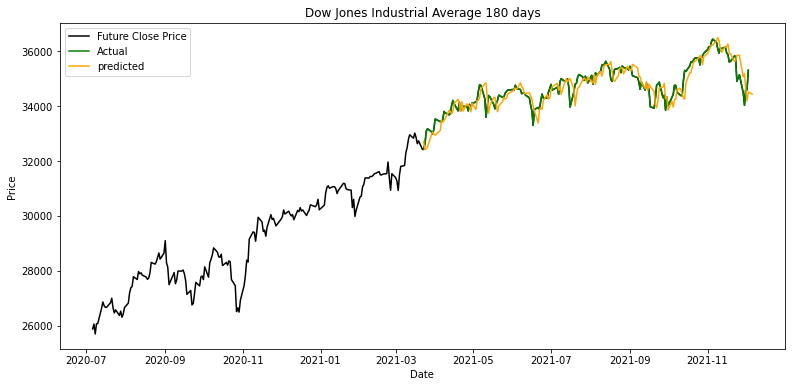

In [5292]:
plotReg('Dow Jones Industrial Average 180 days', dji.index, dji[['Future Close']], dji_ti.iloc[-180:], dji_refeatures, lr)

In [5293]:
lrEval = evaluate(reg, y_test, y_pred)
printEval(reg, lrEval)

Mean Squared Error:  280.3882878840392
Adjusted R squared 0.9958376183210622


<h2>Polynomial Regression</h2>

In [5294]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
pr=make_pipeline(PolynomialFeatures(degree),LinearRegression())
pr.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [5295]:
y_pred = pr.predict(X_test)  #Accuracy
#y_pred

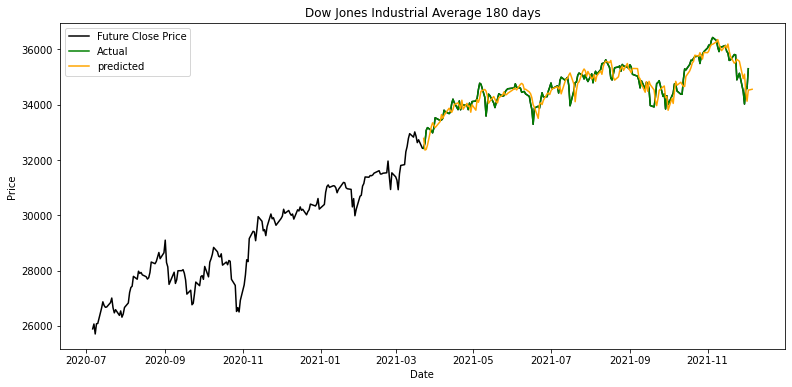

In [5296]:
plotReg('Dow Jones Industrial Average 180 days', dji.index, dji[['Future Close']], dji_ti.iloc[-180:], dji_refeatures, pr)

In [5297]:
prEval = evaluate(reg, y_test, y_pred)
printEval(reg, prEval)

Mean Squared Error:  335.654075928192
Adjusted R squared 0.9940350608944387


In [5298]:
def finalEvaluate(pred):
    down = pred.count(0)
    up = pred.count(1)
    upText = "The model suggests that you should sell"
    downText = "The model suggests that you should buy"
    print(pred)
    if up > down:
        print(upText)
        return True
    elif up < down:
        print(downText)
        return True
    else:
        return False

In [5299]:
def regPredict(classifier, pred, target):
    predict = classifier.predict(pred)
    tg = target['Close'].values[0]
    if predict[0] > tg:
        return 1
    else:
        return 0


In [5300]:
from sklearn.preprocessing import normalize
def finalPredict(target, target_features, retarget_features, dctEvaluation, forestEvaluation, logisticEvaluation, xgbEvaluation, lrEvaluation, prEvaluation):
    X = target.loc[:, target_features].values
    X_test = sc.transform(X)
    reX = target.loc[:, retarget_features].values
    reX_test = sc.transform(reX)
    dctE = dctEvaluation.copy()
    forestE = forestEvaluation.copy()
    logisticE = logisticEvaluation.copy()
    xgbE = xgbEvaluation.copy()
    lrE = lrEvaluation.copy()
    prE = prEvaluation.copy()
    evaluation = []
    evaluation.append(dctE[0])
    evaluation.append(forestE[0])
    evaluation.append(logisticE[0])
    evaluation.append(xgbE[0])
    evaluation.append(lrE[1])
    evaluation.append(prE[1])
    pred = []
    pred.append(dtc.predict(X_test)[0])
    pred.append(forest.predict(X_test)[0])
    pred.append(logistic.predict(X_test)[0])
    pred.append(xgb.predict(X_test)[0])
    pred.append(regPredict(lr, reX_test, target))
    pred.append(regPredict(pr, reX_test, target))
    final = finalEvaluate(pred)
    if final == False:
        min_value = min(evaluation)
        min_index = evaluation.index(min_value)
        pred.pop(min_index)
        finalEvaluate(pred)


In [5301]:
list_dctEval = []
list_forestEval = []
list_logisticEval = []
list_xgbEval = []
list_dctEval.append(dctEval)
list_forestEval.append(forestEval)
list_logisticEval.append(logisticEval)
list_xgbEval.append(xgbEval)

In [5302]:
finalPredict(dji_target, dji_features,dji_refeatures, dctEval, forestEval, logisticEval, xgbEval, lrEval, prEval)


[1, 1, 1, 0, 0, 0]
[1, 1, 0, 0, 0]
The model suggests that you should buy


<h1>Nikkei 225 Stock Average</h1>

<h2>Feature Selection</h2>

In [5303]:
n225['Future Close'] = n225['Close'].shift(-1)
n225

/Users/skooter/Library/Python/3.9/lib/python/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,High,Low,Open,Close,Volume,Adj Close,Future Close
Date,,,,,,,
2016-01-04,18951.119141,18394.429688,18818.580078,18450.980469,140200000.0,18450.980469,18374.000000
2016-01-05,18547.380859,18327.519531,18398.759766,18374.000000,132300000.0,18374.000000,18191.320312
2016-01-06,18469.380859,18064.300781,18410.570312,18191.320312,142200000.0,18191.320312,17767.339844
2016-01-07,18172.039062,17767.339844,18139.769531,17767.339844,168000000.0,17767.339844,17697.960938
2016-01-08,17975.310547,17509.640625,17562.230469,17697.960938,184300000.0,17697.960938,17218.960938
...,...,...,...,...,...,...,...
2021-11-30,28718.699219,27819.140625,28611.730469,27821.759766,140700000.0,27821.759766,27935.619141
2021-12-01,28106.300781,27594.009766,27866.730469,27935.619141,80900000.0,27935.619141,27753.369141
2021-12-02,27938.550781,27644.960938,27716.199219,27753.369141,77400000.0,27753.369141,28029.570312


In [5304]:
target = computeTarget(n225['Close'], n225['Future Close'])

n225['Target'] = target

In [5305]:
close = n225['Close']
high = n225['High']
low = n225['Low']
open = n225['Open']
volume  = n225['Volume']

In [5306]:
n225_ti = pd.DataFrame()
n225_ti['SMA20'] = talib.SMA(close, timeperiod=20)
n225_ti['SMA50'] = talib.SMA(close, timeperiod=50)
n225_ti['SMA200'] = talib.SMA(close, timeperiod=200)
n225_ti['EMA'] = talib.EMA(close, timeperiod=14)
n225_ti['OBV'] = talib.OBV(close, volume)
n225_ti['RSI14'] = talib.RSI(close, timeperiod=14)
n225_ti['ADX'] = talib.ADX(high, low, close, timeperiod=14)
n225_ti['ADXR'] = talib.ADXR(high, low, close, timeperiod=14)
n225_ti['aroondown'], n225_ti['aroonup'] = talib.AROON(high, low, timeperiod=14)
n225_ti['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)
n225_ti['AROONOSC'] = talib.AROONOSC(high, low, timeperiod=14)
n225_ti['BOP'] = talib.BOP(open, high, low, close)
n225_ti['CCI'] = talib.CCI(high, low, close, timeperiod=14)
n225_ti['CMO'] = talib.CMO(close, timeperiod=14)
n225_ti['DX'] = talib.DX(high, low, close, timeperiod=14)
n225_ti['macd'],n225_ti['macdsignal'],n225_ti['macdhist'] = talib.MACD(close, fastperiod = 12, slowperiod=26, signalperiod=9)
n225_ti['MFI'] = talib.MFI(high, low, close, volume, timeperiod=14)
n225_ti['MINUS_DI'] = talib.MINUS_DI(high, low, close, timeperiod=14)
n225_ti['MINUS_DM'] = talib.MINUS_DM(high, low, timeperiod=14)
n225_ti['MOM'] = talib.MOM(close, timeperiod=14)
n225_ti['PLUS_DI'] = talib.PLUS_DI(high, low, close, timeperiod=14)
n225_ti['PLUS_DM'] = talib.PLUS_DM(high, low, timeperiod=14)
n225_ti['PPO'] = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0)
n225_ti['ROC'] = talib.ROC(close, timeperiod=10)
n225_ti['ROCP'] = talib.ROCP(close, timeperiod=10)
n225_ti['ROCR'] = talib.ROCR(close, timeperiod=10)
n225_ti['ROCR100'] = talib.ROCR100(close, timeperiod=10)
n225_ti['slowk'], n225_ti['slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowd_period=3, slowd_matype=0)
n225_ti['fastk'], n225_ti['fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
n225_ti['TRIX'] = talib.TRIX(close, timeperiod=30)
n225_ti['ULTOSC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
n225_ti['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)
n225_ti['Target'] = n225['Target']
n225_ti['Close'] = n225['Close']
n225_ti['Re Target'] = n225['Future Close']
n225_ti

,SMA20,SMA50,SMA200,EMA,OBV,RSI14,ADX,ADXR,aroondown,aroonup,...,slowk,slowd,fastk,fastd,TRIX,ULTOSC,WILLR,Target,Close,Re Target
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,1.402000e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18450.980469,18374.000000
2016-01-05,NaN,NaN,NaN,NaN,7.900000e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18374.000000,18191.320312
2016-01-06,NaN,NaN,NaN,NaN,-1.343000e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18191.320312,17767.339844
2016-01-07,NaN,NaN,NaN,NaN,-3.023000e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17767.339844,17697.960938
2016-01-08,NaN,NaN,NaN,NaN,-4.866000e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17697.960938,17218.960938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,29370.608398,29153.891992,28943.025322,29066.518032,5.449700e+09,31.862883,16.441484,14.666264,100.000000,35.714286,...,6.090439,17.547172,0.135083,6.090439,0.041502,31.087620,-99.877712,1,27821.759766,27935.619141
2021-12-01,29285.035352,29106.137578,28938.807471,28915.731513,5.530600e+09,33.915601,18.932162,15.663407,100.000000,28.571429,...,7.799032,12.005260,17.284336,7.799032,0.038143,33.765736,-85.567345,0,27935.619141,27753.369141
2021-12-02,29196.658789,29051.203945,28930.631816,28760.749863,5.453200e+09,32.241270,21.244934,16.558292,92.857143,21.428571,...,8.861125,7.583532,9.163954,8.861125,0.033823,31.547181,-93.267226,1,27753.369141,28029.570312


In [5307]:

n225_target = n225_ti.tail(1)

In [5308]:
n225_ti = n225_ti.dropna()
n225_features = selectFeatures(n225_ti, 'Target')
n225_features.remove('Re Target')
n225_features.remove('Close')
n225_features

['RSI14',
 'ADXR',
 'aroondown',
 'aroonup',
 'BOP',
 'CCI',
 'CMO',
 'MINUS_DI',
 'PLUS_DI',
 'ROC',
 'ROCR100',
 'slowk',
 'slowd',
 'fastd',
 'TRIX',
 'ULTOSC',
 'WILLR']

In [5309]:
X = n225_ti.loc[:, n225_features].values
#X = dji_ti.loc[:, ['CCI', 'DX', 'MINUS_DI', 'PLUS_DM', 'slowd']].values
y = n225_ti.loc[:, ['Target']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5310]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2>Decision Tree</h2>

In [5311]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [5312]:
# Prediction
#
y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1])

In [5313]:
# Look at the actual y_test
#
y_test

array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [5314]:
dctEval = evaluate(cla, y_test, y_pred)
printEval(cla, dctEval)

Accuracy Score:  0.54
Confusion Matrix: 
 [[54 51]
 [64 81]]
F1 Score:  0.5848375451263538
Precision Score:  0.6136363636363636
Recall score:  0.5586206896551724
Area Under Curve score:  0.5364532019704433


<h2>Random Forest</h2>

In [5315]:
forest = RandomForestClassifier(n_estimators = 1000, random_state = 43, max_depth=4, min_samples_split=2 )
forest.fit(X_train, y_train)

/var/folders/_t/ffqnjnx55t7_d2v9hx5smxm00000gn/T/ipykernel_1139/2696115339.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, n_estimators=1000, random_state=43)

In [5316]:
# Prediction
#
y_pred = forest.predict(X_test)  #Accuracy
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [5317]:
#y_test

In [5318]:
forestEval = evaluate(cla, y_test, y_pred)
printEval(cla, forestEval)

Accuracy Score:  0.512
Confusion Matrix: 
 [[53 52]
 [70 75]]
F1 Score:  0.551470588235294
Precision Score:  0.5905511811023622
Recall score:  0.5172413793103449
Area Under Curve score:  0.5110016420361247


<h2>Logistic Regression</h2>

In [5319]:
# Logistic Regression Classifier: Create and Train the model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [5320]:
# Prediction
y_pred = logistic.predict(X_test)  #Accuracy
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0])

In [5321]:
# Look at the actual y_test
#y_test

In [5322]:
logisticEval = evaluate(cla, y_test, y_pred)
printEval(cla, logisticEval)

Accuracy Score:  0.524
Confusion Matrix: 
 [[48 57]
 [62 83]]
F1 Score:  0.5824561403508771
Precision Score:  0.5928571428571429
Recall score:  0.5724137931034483
Area Under Curve score:  0.5147783251231527


<h2>XGBoost</h2>

In [5323]:
from xgboost import XGBClassifier
from numpy import loadtxt
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[02:40:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [5324]:
y_pred = xgb.predict(X_test)  #Accuracy
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0])

In [5325]:
#y_test

In [5326]:
xgbEval = evaluate(cla, y_test, y_pred)
printEval(cla, xgbEval)

Accuracy Score:  0.496
Confusion Matrix: 
 [[52 53]
 [73 72]]
F1 Score:  0.5333333333333333
Precision Score:  0.576
Recall score:  0.496551724137931
Area Under Curve score:  0.4958949096880132


<h2>Linear Regress</h2>

In [5327]:
n225_refeatures = selectFeatures(n225_ti,'Re Target')
n225_refeatures.remove('Target')
n225_refeatures.remove('Close')
n225_refeatures

['ADX',
 'ADXR',
 'aroondown',
 'aroonup',
 'BOP',
 'CCI',
 'DX',
 'MINUS_DI',
 'PLUS_DI',
 'PPO',
 'ROC',
 'slowk',
 'fastk',
 'fastd',
 'TRIX',
 'ULTOSC',
 'WILLR']

In [5328]:
from sklearn.model_selection import train_test_split
X = n225_ti.loc[:, n225_refeatures].values
y = n225_ti.loc[:, ['Re Target']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5329]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5330]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
from sklearn import metrics

In [5331]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [5332]:
y_pred = lr.predict(X_test)
#print(y_pred)

In [5333]:
dframe = pd.DataFrame({'Actual':y_test.flatten(),'predicted':y_pred.flatten()})

In [5334]:
print('Slope:', lr.coef_)
print('Intercept:', lr.intercept_)

Slope: [[ -644.93309224   436.16892062  -202.4459335   -273.53328294
    114.95868951  -170.06512127   266.14816376  -880.37612621
   -329.20201776   149.15220519   491.07331821   291.11093542
    -18.06539948   291.11093542   644.89692355 -1170.2704666
     52.37229302]]
Intercept: [22830.01849304]


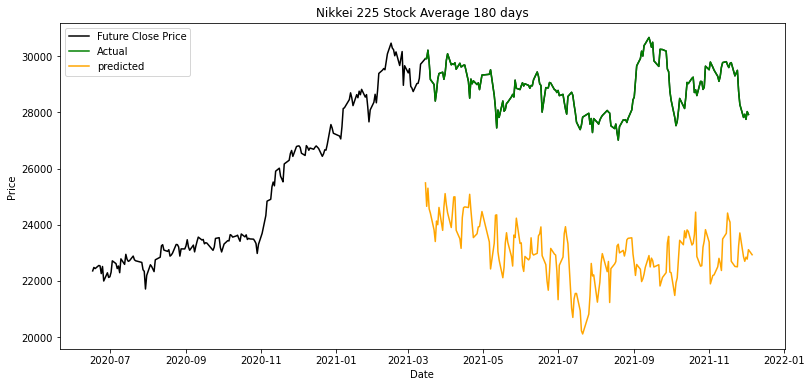

In [5335]:
plotReg('Nikkei 225 Stock Average 180 days', n225.index, n225[['Future Close']], n225_ti.iloc[-180:], n225_refeatures, lr)

In [5336]:
lrEval = evaluate(reg, y_test, y_pred)
printEval(reg, lrEval)

Mean Squared Error:  3128.152072421515
Adjusted R squared 0.12357701503687557


<h2>Polynomial Regression</h2>

In [5337]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
pr=make_pipeline(PolynomialFeatures(degree),LinearRegression())
pr.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [5338]:
y_pred = pr.predict(X_test)  #Accuracy
#y_pred

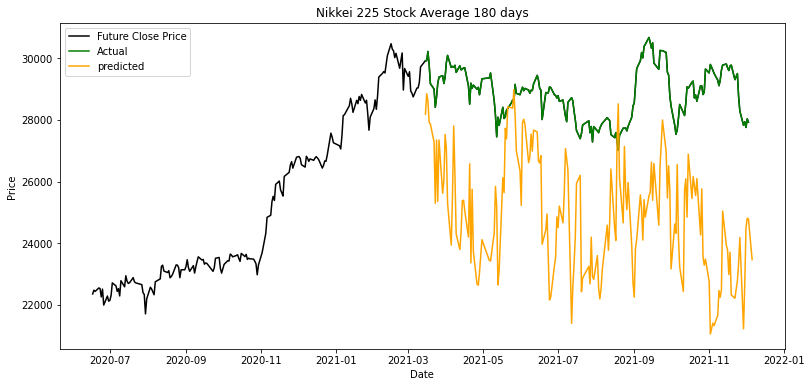

In [5339]:
plotReg('Nikkei 225 Stock Average 180 days', n225.index, n225[['Future Close']], n225_ti.iloc[-180:], n225_refeatures, pr)

In [5340]:
gsEval = evaluate(reg, y_test, y_pred)
printEval(reg, gsEval)

Mean Squared Error:  2689.563125128305
Adjusted R squared 0.35210962688205927


In [5341]:
list_dctEval.append(dctEval)
list_forestEval.append(forestEval)
list_logisticEval.append(logisticEval)
list_xgbEval.append(xgbEval)

In [5342]:
finalPredict(dji_target, dji_features,dji_refeatures, dctEval, forestEval, logisticEval, xgbEval, lrEval, prEval)


[1, 1, 0, 1, 0, 1]
The model suggests that you should sell


<h1>Heng Seng Index</h1>

<h2>Feature Selection</h2>

In [5343]:
hsi['Future Close'] = hsi['Close'].shift(-1)
hsi

,High,Low,Open,Close,Volume,Adj Close,Future Close
Date,,,,,,,
2016-01-04,21794.839844,21227.609375,21782.619141,21327.119141,1.712095e+09,21327.119141,21188.720703
2016-01-05,21452.740234,21095.900391,21318.689453,21188.720703,1.484745e+09,21188.720703,20980.810547
2016-01-06,21199.619141,20947.300781,21142.630859,20980.810547,1.651083e+09,20980.810547,20333.339844
2016-01-07,20826.439453,20323.970703,20772.599609,20333.339844,2.982004e+09,20333.339844,20453.710938
2016-01-08,20596.419922,20324.619141,20491.880859,20453.710938,2.078133e+09,20453.710938,19888.500000
...,...,...,...,...,...,...,...
2021-11-30,23888.369141,23175.369141,23782.859375,23475.259766,3.344858e+09,23475.259766,23658.919922
2021-12-01,23864.300781,23537.650391,23595.570312,23658.919922,2.118635e+09,23658.919922,23788.929688
2021-12-02,23807.000000,23517.519531,23524.050781,23788.929688,2.328241e+09,23788.929688,23766.689453


In [5344]:
target = computeTarget(hsi['Close'], hsi['Future Close'])

hsi['Target'] = target


In [5345]:
close = hsi['Close']
high = hsi['High']
low = hsi['Low']
open = hsi['Open']
volume  = hsi['Volume']

In [5346]:
hsi_ti = pd.DataFrame()
hsi_ti['SMA20'] = talib.SMA(close, timeperiod=20)
hsi_ti['SMA50'] = talib.SMA(close, timeperiod=50)
hsi_ti['SMA200'] = talib.SMA(close, timeperiod=200)
hsi_ti['EMA'] = talib.EMA(close, timeperiod=14)
hsi_ti['OBV'] = talib.OBV(close, volume)
hsi_ti['RSI14'] = talib.RSI(close, timeperiod=14)
hsi_ti['ADX'] = talib.ADX(high, low, close, timeperiod=14)
hsi_ti['ADXR'] = talib.ADXR(high, low, close, timeperiod=14)
hsi_ti['aroondown'], hsi_ti['aroonup'] = talib.AROON(high, low, timeperiod=14)
hsi_ti['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)
hsi_ti['AROONOSC'] = talib.AROONOSC(high, low, timeperiod=14)
hsi_ti['BOP'] = talib.BOP(open, high, low, close)
hsi_ti['CCI'] = talib.CCI(high, low, close, timeperiod=14)
hsi_ti['CMO'] = talib.CMO(close, timeperiod=14)
hsi_ti['DX'] = talib.DX(high, low, close, timeperiod=14)
hsi_ti['macd'],hsi_ti['macdsignal'],hsi_ti['macdhist'] = talib.MACD(close, fastperiod = 12, slowperiod=26, signalperiod=9)
hsi_ti['MFI'] = talib.MFI(high, low, close, volume, timeperiod=14)
hsi_ti['MINUS_DI'] = talib.MINUS_DI(high, low, close, timeperiod=14)
hsi_ti['MINUS_DM'] = talib.MINUS_DM(high, low, timeperiod=14)
hsi_ti['MOM'] = talib.MOM(close, timeperiod=14)
hsi_ti['PLUS_DI'] = talib.PLUS_DI(high, low, close, timeperiod=14)
hsi_ti['PLUS_DM'] = talib.PLUS_DM(high, low, timeperiod=14)
hsi_ti['PPO'] = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0)
hsi_ti['ROC'] = talib.ROC(close, timeperiod=10)
hsi_ti['ROCP'] = talib.ROCP(close, timeperiod=10)
hsi_ti['ROCR'] = talib.ROCR(close, timeperiod=10)
hsi_ti['ROCR100'] = talib.ROCR100(close, timeperiod=10)
hsi_ti['slowk'], hsi_ti['slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowd_period=3, slowd_matype=0)
hsi_ti['fastk'], hsi_ti['fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
hsi_ti['TRIX'] = talib.TRIX(close, timeperiod=30)
hsi_ti['ULTOSC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
hsi_ti['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)
hsi_ti['Target'] = hsi['Target']
hsi_ti['Close'] = hsi['Close']
hsi_ti['Re Target'] = hsi['Future Close']
hsi_ti

,SMA20,SMA50,SMA200,EMA,OBV,RSI14,ADX,ADXR,aroondown,aroonup,...,slowk,slowd,fastk,fastd,TRIX,ULTOSC,WILLR,Target,Close,Re Target
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,1.712095e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,21327.119141,21188.720703
2016-01-05,NaN,NaN,NaN,NaN,2.273497e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,21188.720703,20980.810547
2016-01-06,NaN,NaN,NaN,NaN,-1.423734e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20980.810547,20333.339844
2016-01-07,NaN,NaN,NaN,NaN,-4.405738e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20333.339844,20453.710938
2016-01-08,NaN,NaN,NaN,NaN,-2.327604e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20453.710938,19888.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,24891.525586,24962.398438,27281.231582,24606.557641,1.796668e+11,26.337965,20.745865,17.735988,100.000000,28.571429,...,8.961841,13.965130,17.891526,8.961841,-0.060435,35.699137,-88.337193,1,23475.259766,23658.919922
2021-12-01,24823.234082,24942.219844,27252.928828,24480.205945,1.817854e+11,30.643761,23.149249,18.413873,92.857143,21.428571,...,18.530248,14.225536,30.464877,18.530248,-0.063597,35.681700,-81.194613,1,23658.919922,23788.929688
2021-12-02,24751.421094,24919.583242,27224.492529,24388.035777,1.841137e+11,33.602504,25.404155,19.054933,85.714286,14.285714,...,31.527417,19.673169,46.225847,31.527417,-0.067209,41.550020,-76.138507,0,23788.929688,23766.689453


In [5347]:
hsi_target = hsi_ti.tail(1)

In [5348]:
hsi_ti = hsi_ti.dropna()
hsi_features = selectFeatures(hsi_ti,'Target')
hsi_features.remove('Re Target')
hsi_features.remove('Close')
hsi_features

['RSI14',
 'ADX',
 'ADXR',
 'BOP',
 'CMO',
 'DX',
 'macdhist',
 'MINUS_DI',
 'PLUS_DI',
 'PPO',
 'ROC',
 'ROCR100',
 'slowk',
 'fastk',
 'fastd',
 'TRIX',
 'ULTOSC']

In [5349]:
X = hsi_ti.loc[:, hsi_features].values
#X = dji_ti.loc[:, ['CCI', 'DX', 'MINUS_DI', 'PLUS_DM', 'slowd']].values
y = hsi_ti.loc[:, ['Target']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5350]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2>Decision Tree</h2>

In [5351]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [5352]:
# Prediction
#
y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [5353]:
# Look at the actual y_test
#
y_test

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [5354]:
dctEval = evaluate(cla, y_test, y_pred)
printEval(cla, dctEval)

Accuracy Score:  0.5515873015873016
Confusion Matrix: 
 [[67 49]
 [64 72]]
F1 Score:  0.5603112840466925
Precision Score:  0.5950413223140496
Recall score:  0.5294117647058824
Area Under Curve score:  0.553498985801217


<h2>Random Forest</h2>

In [5355]:
forest = RandomForestClassifier(n_estimators = 1000, random_state = 40, max_depth=2 )
forest.fit(X_train, y_train)

/var/folders/_t/ffqnjnx55t7_d2v9hx5smxm00000gn/T/ipykernel_1139/33020272.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=40)

In [5356]:
# Prediction
#
y_pred = forest.predict(X_test)  #Accuracy
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5357]:
forestEval = evaluate(cla, y_test, y_pred)
printEval(cla, forestEval)

Accuracy Score:  0.5158730158730159
Confusion Matrix: 
 [[  3 113]
 [  9 127]]
F1 Score:  0.6755319148936171
Precision Score:  0.5291666666666667
Recall score:  0.9338235294117647
Area Under Curve score:  0.479842799188641


<h2>Logistic Regression</h2>

In [5358]:
# Logistic Regression Classifier: Create and Train the model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [5359]:
# Prediction
y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [5360]:
# Look at the actual y_test
#y_test

In [5361]:
logisticEval = evaluate(cla, y_test, y_pred)
printEval(cla, logisticEval)

Accuracy Score:  0.5515873015873016
Confusion Matrix: 
 [[67 49]
 [64 72]]
F1 Score:  0.5603112840466925
Precision Score:  0.5950413223140496
Recall score:  0.5294117647058824
Area Under Curve score:  0.553498985801217


<h2>XGBoost</h2>

In [5362]:
from xgboost import XGBClassifier
from numpy import loadtxt
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[02:40:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [5363]:
y_pred = xgb.predict(X_test)  #Accuracy
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [5364]:
#y_test

In [5365]:
xgbEval = evaluate(cla, y_test, y_pred)
printEval(cla, xgbEval)

Accuracy Score:  0.49603174603174605
Confusion Matrix: 
 [[56 60]
 [67 69]]
F1 Score:  0.520754716981132
Precision Score:  0.5348837209302325
Recall score:  0.5073529411764706
Area Under Curve score:  0.4950557809330628


<h2>Linear Regression</h2>

In [5366]:
hsi_refeatures = selectFeatures(hsi_ti,'Re Target')
hsi_refeatures.remove('Target')
hsi_refeatures.remove('Close')
hsi_refeatures

['RSI14',
 'ADX',
 'ADXR',
 'BOP',
 'CMO',
 'DX',
 'PLUS_DI',
 'PPO',
 'ROC',
 'ROCR100',
 'slowk',
 'slowd',
 'fastk',
 'fastd',
 'TRIX',
 'ULTOSC',
 'WILLR']

In [5367]:
from sklearn.model_selection import train_test_split
X = hsi_ti.loc[:, hsi_refeatures].values
#X = dji_ti.loc[:, ['CCI', 'DX', 'MINUS_DI', 'PLUS_DM', 'slowd']].values
y = hsi_ti.loc[:, ['Re Target']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

In [5368]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5369]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
from sklearn import metrics

In [5370]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [5371]:
y_pred = lr.predict(X_test)
print(y_pred)

[[27042.59335664]
 [27344.22766346]
 [27448.90415618]
 [27269.04381285]
 [27488.9552871 ]
 [27638.03217892]
 [27704.81182869]
 [27302.31414168]
 [27565.2023342 ]
 [27583.46529375]
 [27468.42080154]
 [27485.60144737]
 [27408.11350518]
 [27539.08422093]
 [27862.86225411]
 [27913.19722955]
 [27730.07893724]
 [27749.09855623]
 [27856.72968528]
 [28004.71078555]
 [27943.6479236 ]
 [28001.11428719]
 [28094.32081616]
 [27921.79574487]
 [28055.36158261]
 [28059.61081996]
 [28151.45630381]
 [28240.72715294]
 [28325.26493474]
 [27987.95031627]
 [28394.5708569 ]
 [28177.06561082]
 [28146.66092368]
 [28141.03711043]
 [28415.98485748]
 [28432.13302467]
 [28728.33365174]
 [28685.15636676]
 [29182.87905543]
 [29615.52606075]
 [29570.97235549]
 [29476.40228343]
 [29458.70115987]
 [29212.79647509]
 [29174.92374051]
 [29022.97088314]
 [28955.2500824 ]
 [29000.60517381]
 [28871.89194971]
 [28291.23418784]
 [28793.44743315]
 [28907.61485667]
 [29307.80636615]
 [29264.78748323]
 [29274.98867197]
 [29098.98

In [5372]:
dframe = pd.DataFrame({'Actual':y_test.flatten(),'predicted':y_pred.flatten()})

In [5373]:
print('Slope:', lr.coef_)
print('Intercept:', lr.intercept_)

Slope: [[-8.48259131e+14  1.70562500e+02 -5.78612435e+01  6.91211301e+01
   8.48259131e+14 -1.67772536e+02  2.63300315e+02  4.46164351e+02
  -1.03977642e+16  1.03977642e+16 -8.24942150e+14 -1.44809011e+02
   4.94764098e+01  8.24942150e+14  1.04886450e+03  3.77847395e+02
   3.08753067e+02]]
Intercept: [26752.69553851]


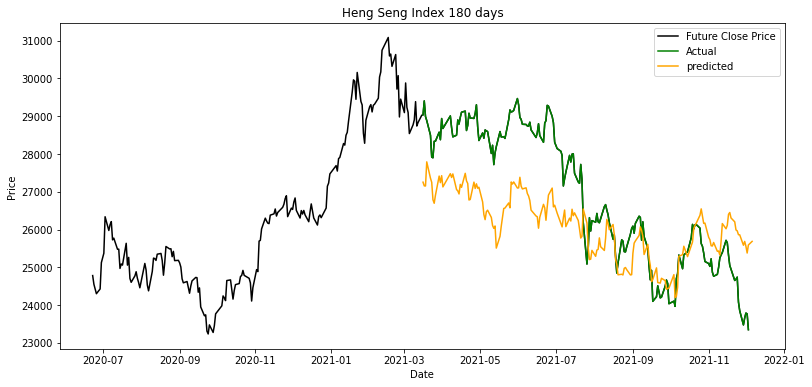

In [5374]:
plotReg('Heng Seng Index 180 days', hsi.index, hsi[['Future Close']], hsi_ti.iloc[-180:], hsi_refeatures, lr)

In [5375]:
lrEval = evaluate(reg, y_test, y_pred)
printEval(reg, lrEval)

Mean Squared Error:  1309.3465343739201
Adjusted R squared 0.4739865213175418


<h2>Polynomial Regression</h2>

In [5376]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
pr=make_pipeline(PolynomialFeatures(degree),LinearRegression())
pr.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [5377]:
y_pred = pr.predict(X_test)  #Accuracy
y_pred

array([[25015.71209717],
       [23994.21618652],
       [23863.47229004],
       [25762.74151611],
       [26170.32281494],
       [26820.70861816],
       [25559.3338623 ],
       [24494.06158447],
       [26035.01702881],
       [25689.80688477],
       [24440.94372559],
       [23568.42614746],
       [24603.58270264],
       [25900.19995117],
       [27507.70031738],
       [27141.70233154],
       [26651.97381592],
       [27920.15539551],
       [27810.67126465],
       [26409.58782959],
       [27791.25537109],
       [29804.5447998 ],
       [28336.63433838],
       [27378.81207275],
       [26297.9128418 ],
       [26487.14605713],
       [26138.65582275],
       [26907.62585449],
       [27212.92626953],
       [27830.93847656],
       [28228.36724854],
       [29252.06622314],
       [29587.38739014],
       [30334.84692383],
       [31279.76641846],
       [33033.42108154],
       [34591.05755615],
       [34714.63745117],
       [33989.98400879],
       [33222.79089355],


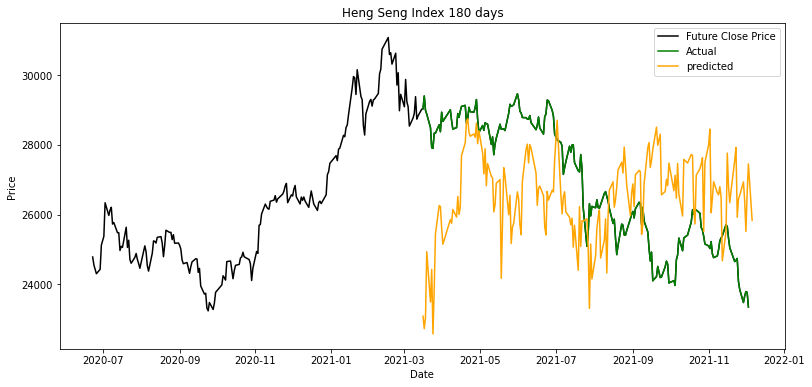

In [5378]:
plotReg('Heng Seng Index 180 days', hsi.index, hsi[['Future Close']], hsi_ti.iloc[-180:], hsi_refeatures, pr)

In [5379]:
gsEval = evaluate(reg, y_test, y_pred)
printEval(reg, gsEval)

Mean Squared Error:  2322.342041663243
Adjusted R squared -0.654779131463326


In [5380]:
list_dctEval.append(dctEval)
list_forestEval.append(forestEval)
list_logisticEval.append(logisticEval)
list_xgbEval.append(xgbEval)

In [5381]:
finalPredict(dji_target, dji_features,dji_refeatures, dctEval, forestEval, logisticEval, xgbEval, lrEval, prEval)


[1, 1, 1, 1, 1, 1]
The model suggests that you should sell


<h1>SSE Composite Index</h1>

<h2>Feature Selection</h2>

In [5382]:
sse['Future Close'] = sse['Close'].shift(-1)
sse

,High,Low,Open,Close,Volume,Adj Close,Future Close
Date,,,,,,,
2016-01-04,3538.688965,3295.740967,3536.589111,3296.258057,184400,3296.258057,3287.710938
2016-01-05,3328.138916,3189.604980,3196.650879,3287.710938,266900,3287.710938,3361.840088
2016-01-06,3362.974121,3288.933105,3291.195068,3361.840088,238900,3361.840088,3125.001953
2016-01-07,3309.656982,3115.885010,3309.656982,3125.001953,70600,3125.001953,3186.412109
2016-01-08,3235.450928,3056.877930,3194.625000,3186.412109,286400,3186.412109,3016.704102
...,...,...,...,...,...,...,...
2021-11-30,3582.120117,3546.360107,3570.750000,3563.889893,349200,3563.889893,3576.889893
2021-12-01,3576.889893,3558.689941,3561.889893,3576.889893,329900,3576.889893,3573.840088
2021-12-02,3586.870117,3567.139893,3573.250000,3573.840088,354000,3573.840088,3607.429932


In [5383]:
target = computeTarget(sse['Close'], sse['Future Close'])

sse['Target'] = target

In [5384]:
close = sse['Close']
high = sse['High']
low = sse['Low']
open = sse['Open']
volume  = sse['Volume']

In [5385]:
sse_ti = pd.DataFrame()
sse_ti['SMA20'] = talib.SMA(close, timeperiod=20)
sse_ti['SMA50'] = talib.SMA(close, timeperiod=50)
sse_ti['SMA200'] = talib.SMA(close, timeperiod=200)
sse_ti['EMA'] = talib.EMA(close, timeperiod=14)
sse_ti['OBV'] = talib.OBV(close, volume)
sse_ti['RSI14'] = talib.RSI(close, timeperiod=14)
sse_ti['ADX'] = talib.ADX(high, low, close, timeperiod=14)
sse_ti['ADXR'] = talib.ADXR(high, low, close, timeperiod=14)
sse_ti['aroondown'], sse_ti['aroonup'] = talib.AROON(high, low, timeperiod=14)
sse_ti['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)
sse_ti['AROONOSC'] = talib.AROONOSC(high, low, timeperiod=14)
sse_ti['BOP'] = talib.BOP(open, high, low, close)
sse_ti['CCI'] = talib.CCI(high, low, close, timeperiod=14)
sse_ti['CMO'] = talib.CMO(close, timeperiod=14)
sse_ti['DX'] = talib.DX(high, low, close, timeperiod=14)
sse_ti['macd'],sse_ti['macdsignal'],sse_ti['macdhist'] = talib.MACD(close, fastperiod = 12, slowperiod=26, signalperiod=9)
sse_ti['MFI'] = talib.MFI(high, low, close, volume, timeperiod=14)
sse_ti['MINUS_DI'] = talib.MINUS_DI(high, low, close, timeperiod=14)
sse_ti['MINUS_DM'] = talib.MINUS_DM(high, low, timeperiod=14)
sse_ti['MOM'] = talib.MOM(close, timeperiod=14)
sse_ti['PLUS_DI'] = talib.PLUS_DI(high, low, close, timeperiod=14)
sse_ti['PLUS_DM'] = talib.PLUS_DM(high, low, timeperiod=14)
sse_ti['PPO'] = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0)
sse_ti['ROC'] = talib.ROC(close, timeperiod=10)
sse_ti['ROCP'] = talib.ROCP(close, timeperiod=10)
sse_ti['ROCR'] = talib.ROCR(close, timeperiod=10)
sse_ti['ROCR100'] = talib.ROCR100(close, timeperiod=10)
sse_ti['slowk'], sse_ti['slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowd_period=3, slowd_matype=0)
sse_ti['fastk'], sse_ti['fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
sse_ti['TRIX'] = talib.TRIX(close, timeperiod=30)
sse_ti['ULTOSC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
sse_ti['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)
sse_ti['Target'] = sse['Target']
sse_ti['Close'] = sse['Close']
sse_ti['Re Target'] = sse['Future Close']
sse_ti

,SMA20,SMA50,SMA200,EMA,OBV,RSI14,ADX,ADXR,aroondown,aroonup,...,slowk,slowd,fastk,fastd,TRIX,ULTOSC,WILLR,Target,Close,Re Target
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,1.844000e+05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3296.258057,3287.710938
2016-01-05,NaN,NaN,NaN,NaN,-8.250000e+04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3287.710938,3361.840088
2016-01-06,NaN,NaN,NaN,NaN,1.564000e+05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3361.840088,3125.001953
2016-01-07,NaN,NaN,NaN,NaN,8.580000e+04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3125.001953,3186.412109
2016-01-08,NaN,NaN,NaN,NaN,3.722000e+05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3186.412109,3016.704102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,3539.961621,3569.247051,3526.930282,3558.920841,2.487330e+07,52.096479,17.369247,22.381258,0.000000,71.428571,...,38.655207,49.692145,49.138835,38.655207,-0.007386,61.739004,-32.396652,1,3563.889893,3576.889893
2021-12-01,3543.879114,3566.477446,3527.288312,3561.316714,2.520320e+07,55.008687,16.461959,21.674837,0.000000,64.285714,...,56.033229,47.676037,71.380042,56.033229,-0.006916,61.441675,-28.837060,0,3576.889893,3573.840088
2021-12-02,3546.227612,3564.702246,3527.489087,3562.986498,2.484920e+07,54.176579,15.321140,20.753905,28.571429,57.142857,...,66.328400,53.672279,78.466324,66.328400,-0.006349,59.264174,-32.239910,1,3573.840088,3607.429932


In [5386]:
sse_target = hsi_ti.tail(1)

In [5387]:
sse_ti = sse_ti.dropna()
sse_features = selectFeatures(sse_ti,'Target')
sse_features.remove('Re Target')
sse_features.remove('Close')
sse_features

['SMA20',
 'EMA',
 'APO',
 'BOP',
 'CMO',
 'macd',
 'macdhist',
 'MINUS_DI',
 'MINUS_DM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'ROC',
 'ROCR100',
 'slowk',
 'TRIX',
 'WILLR']

In [5388]:
X = sse_ti.loc[:, sse_features].values
y = sse_ti.loc[:, ['Target']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5389]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2>Decision Tree</h2>

In [5390]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [5391]:
# Prediction
#
y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1])

In [5392]:
# Look at the actual y_test
#
y_test

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [5393]:
dctEval = evaluate(cla, y_test, y_pred)
printEval(cla, dctEval)

Accuracy Score:  0.5120967741935484
Confusion Matrix: 
 [[56 59]
 [62 71]]
F1 Score:  0.5399239543726235
Precision Score:  0.5461538461538461
Recall score:  0.5338345864661654
Area Under Curve score:  0.5103955541026479


<h2>Random Forest</h2>

In [5394]:
forest = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_features=9)
forest.fit(X_train, y_train)

/var/folders/_t/ffqnjnx55t7_d2v9hx5smxm00000gn/T/ipykernel_1139/371548984.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier(max_features=9, n_estimators=1000, random_state=42)

In [5395]:
# Prediction
#
y_pred = forest.predict(X_test)  #Accuracy
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0])

In [5396]:
forestEval = evaluate(cla, y_test, y_pred)
printEval(cla, forestEval)

Accuracy Score:  0.4798387096774194
Confusion Matrix: 
 [[45 70]
 [59 74]]
F1 Score:  0.5342960288808664
Precision Score:  0.5138888888888888
Recall score:  0.556390977443609
Area Under Curve score:  0.473847662634848


<h2>Logistic Regression</h2>

In [5397]:
# Logistic Regression Classifier: Create and Train the model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [5398]:
# Prediction
y_pred = logistic.predict(X_test)  #Accuracy
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1])

In [5399]:
# Look at the actual y_test
#y_test

In [5400]:
logisticEval = evaluate(cla, y_test, y_pred)
printEval(cla, logisticEval)

Accuracy Score:  0.5241935483870968
Confusion Matrix: 
 [[39 76]
 [42 91]]
F1 Score:  0.6066666666666667
Precision Score:  0.5449101796407185
Recall score:  0.6842105263157895
Area Under Curve score:  0.5116704805491991


<h2>XGBoost</h2>

In [5401]:
from xgboost import XGBClassifier
from numpy import loadtxt
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[02:40:18] WARNING: /

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [5402]:
y_pred = xgb.predict(X_test)  #Accuracy
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0])

In [5403]:
#y_test

In [5404]:
xgbEval = evaluate(cla, y_test, y_pred)
printEval(cla, xgbEval)

Accuracy Score:  0.4959677419354839
Confusion Matrix: 
 [[45 70]
 [55 78]]
F1 Score:  0.5551601423487544
Precision Score:  0.527027027027027
Recall score:  0.5864661654135338
Area Under Curve score:  0.4888852566198103


<h2>Linear Regression</h2>

In [5405]:
sse_refeatures = selectFeatures(sse_ti,'Re Target')
sse_refeatures.remove('Target')
sse_refeatures.remove('Close')
sse_features

['SMA20',
 'EMA',
 'APO',
 'BOP',
 'CMO',
 'macd',
 'macdhist',
 'MINUS_DI',
 'MINUS_DM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'ROC',
 'ROCR100',
 'slowk',
 'TRIX',
 'WILLR']

In [5406]:
from sklearn.model_selection import train_test_split
X = sse_ti.loc[:, sse_refeatures].values
#X = dji_ti.loc[:, ['CCI', 'DX', 'MINUS_DI', 'PLUS_DM', 'slowd']].values
y = sse_ti.loc[:, ['Re Target']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

In [5407]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5408]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
from sklearn import metrics

In [5409]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [5410]:
y_pred = lr.predict(X_test)
print(y_pred)

[[3401.58234124]
 [3399.58831694]
 [3443.16272789]
 [3441.60474413]
 [3433.09040715]
 [3438.22058073]
 [3404.58410764]
 [3400.71682009]
 [3363.36624826]
 [3368.60511833]
 [3334.80560915]
 [3358.57418999]
 [3351.9480893 ]
 [3348.9377353 ]
 [3396.32967357]
 [3382.48001675]
 [3411.71149958]
 [3341.54922927]
 [3366.65462479]
 [3344.59929663]
 [3374.69312467]
 [3374.1438401 ]
 [3350.64997496]
 [3384.93286554]
 [3441.90158295]
 [3472.28446077]
 [3497.16902569]
 [3523.89851809]
 [3551.53325462]
 [3552.47788888]
 [3516.60124913]
 [3573.65147655]
 [3572.09746418]
 [3541.7375918 ]
 [3542.01717004]
 [3572.28951381]
 [3542.67227354]
 [3559.40305096]
 [3605.82621237]
 [3591.01409185]
 [3617.64449267]
 [3561.9657345 ]
 [3563.90845574]
 [3504.08155261]
 [3475.59983525]
 [3493.70551259]
 [3523.45361294]
 [3508.72920083]
 [3484.28882315]
 [3482.75260931]
 [3513.85790763]
 [3585.98907305]
 [3638.09333074]
 [3675.99899494]
 [3682.28497198]
 [3642.42892325]
 [3633.44478941]
 [3549.68693804]
 [3564.4709649

In [5411]:
dframe = pd.DataFrame({'Actual':y_test.flatten(),'predicted':y_pred.flatten()})

In [5412]:
print('Slope:', lr.coef_)
print('Intercept:', lr.intercept_)

Slope: [[ 2.17931500e+02  6.46201408e+00 -3.66389920e+00 -3.44383478e+01
   1.87837780e+00  6.26684625e+01 -1.41481296e+13  1.31736040e+13
   4.60784321e+12  4.12796961e+01 -7.22979410e+01 -3.08626083e+01
   6.69999225e+01  8.95269375e+00 -4.37504474e+14  4.37504474e+14
  -1.30334322e+01]]
Intercept: [3071.22569391]


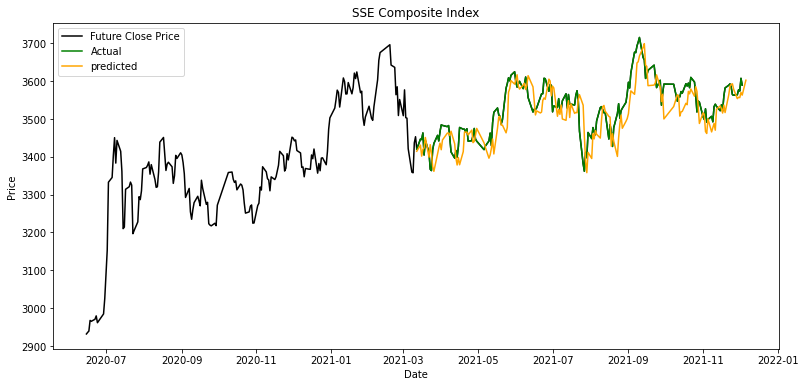

In [5413]:
plotReg('SSE Composite Index', sse.index, sse[['Future Close']], sse_ti.iloc[-180:], sse_refeatures, lr)

In [5414]:
#evaluate("reg", y_test, y_pred)

lrEval = evaluate(reg, y_test, y_pred)
printEval(reg, lrEval)

Mean Squared Error:  37.27302005396619
Adjusted R squared 0.7786732501991906


<h2>Polynomial Regression</h2>

In [5415]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
pr=make_pipeline(PolynomialFeatures(degree),LinearRegression())
pr.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [5416]:
y_pred = pr.predict(X_test)  #Accuracy
y_pred

array([[3430.33657455],
       [3414.97719955],
       [3450.4967308 ],
       [3444.8561058 ],
       [3444.47719955],
       [3447.7701683 ],
       [3424.72701645],
       [3414.34597397],
       [3380.04806137],
       [3370.37618637],
       [3344.52505112],
       [3367.10754204],
       [3363.57680893],
       [3369.53774643],
       [3413.20180893],
       [3401.74770737],
       [3425.33985519],
       [3352.53091049],
       [3369.72805405],
       [3358.81118393],
       [3386.62759018],
       [3389.01723862],
       [3367.5000267 ],
       [3394.54165268],
       [3453.49282455],
       [3471.9107933 ],
       [3482.4732933 ],
       [3507.7232933 ],
       [3521.7232933 ],
       [3522.1451683 ],
       [3483.3170433 ],
       [3526.2389183 ],
       [3523.8326683 ],
       [3522.9420433 ],
       [3534.7467308 ],
       [3583.6998558 ],
       [3566.28676987],
       [3584.82290268],
       [3623.28384018],
       [3598.70571518],
       [3616.6295433 ],
       [3551.033

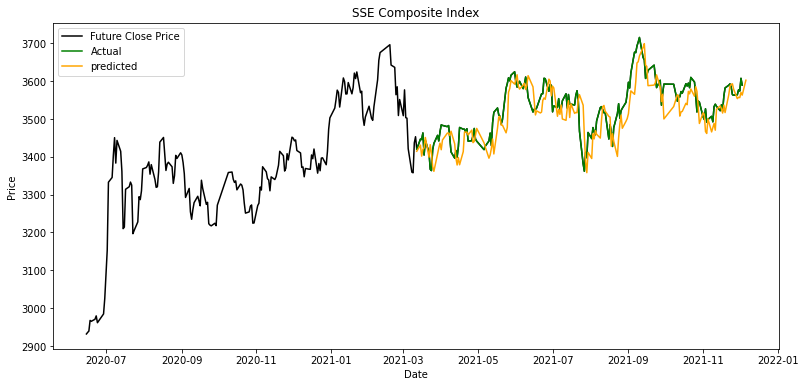

In [5417]:
plotReg('SSE Composite Index', sse.index, sse[['Future Close']], sse_ti.iloc[-180:], sse_refeatures, lr)

In [5418]:
gsEval = evaluate(reg, y_test, y_pred)
printEval(reg, gsEval)

Mean Squared Error:  49.66856153698476
Adjusted R squared 0.6069861047395999


In [5419]:
list_dctEval.append(dctEval)
list_forestEval.append(forestEval)
list_logisticEval.append(logisticEval)
list_xgbEval.append(xgbEval)

In [5425]:
finalPredict(dji_target, dji_features,dji_refeatures, dctEval, forestEval, logisticEval, xgbEval, lrEval, prEval)



[0, 1, 0, 0, 0, 1]
The model suggests that you should buy


In [5420]:
def createResult(eval):
    data = {
        "Accuracy": [eval[0][0], eval[1][0], eval[2][0], eval[3][0]],
        "F1-Score": [eval[0][2], eval[1][2], eval[2][2], eval[3][2]],
        "Precision Score": [eval[0][3], eval[1][3], eval[2][3], eval[3][3]],
        "Recall Score": [eval[0][4], eval[1][4], eval[2][4], eval[3][4]],
        "AUC Score": [eval[0][5], eval[1][5], eval[2][5], eval[3][5]],
    }
    return data

In [5421]:
stock_index = ['DJI', 'N225', 'HSI', 'SSE']
dctResult = pd.DataFrame(createResult(list_dctEval), index=stock_index)
dctResult

,Accuracy,F1-Score,Precision Score,Recall Score,AUC Score
DJI,0.505792,0.549296,0.624000,0.490566,0.510283
N225,0.540000,0.584838,0.613636,0.558621,0.536453
HSI,0.551587,0.560311,0.595041,0.529412,0.553499
SSE,0.512097,0.539924,0.546154,0.533835,0.510396


In [5422]:
forestResult = pd.DataFrame(createResult(list_forestEval), index=stock_index)
forestResult

,Accuracy,F1-Score,Precision Score,Recall Score,AUC Score
DJI,0.594595,0.744526,0.607143,0.962264,0.486132
N225,0.512000,0.551471,0.590551,0.517241,0.511002
HSI,0.515873,0.675532,0.529167,0.933824,0.479843
SSE,0.479839,0.534296,0.513889,0.556391,0.473848


In [5423]:
logisticResult = pd.DataFrame(createResult(list_logisticEval), index=stock_index)
logisticResult

,Accuracy,F1-Score,Precision Score,Recall Score,AUC Score
DJI,0.606178,0.735751,0.625551,0.893082,0.521541
N225,0.524000,0.582456,0.592857,0.572414,0.514778
HSI,0.551587,0.560311,0.595041,0.529412,0.553499
SSE,0.524194,0.606667,0.544910,0.684211,0.511670


In [5424]:
xgbResult = pd.DataFrame(createResult(list_xgbEval), index=stock_index)
xgbResult

,Accuracy,F1-Score,Precision Score,Recall Score,AUC Score
DJI,0.532819,0.610932,0.625000,0.597484,0.513742
N225,0.496000,0.533333,0.576000,0.496552,0.495895
HSI,0.496032,0.520755,0.534884,0.507353,0.495056
SSE,0.495968,0.555160,0.527027,0.586466,0.488885
